# Partie I - Données du système Ford GoBike 
### Par Darnel KOUA

## Plan
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Traitement des données</a></li>
<li><a href="#eu">Exploration Univariée</a></li>
<li><a href="#eb">Exploration Bivariée</a></li>
<li><a href="#em">Exploration Multivariée</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
![](https://img.hoodline.com/uploads/story/image/53586/motivateebike.jpg)

> Cet ensemble de données comprend des informations sur les trajets individuels effectués dans un système de partage de vélos couvrant la grande région de la baie de San Francisco.

<a id='wrangling'></a>
## Traitement des données


In [1]:
# Chargement des packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Chargement des données.

In [2]:
df_ford_GoBike = pd.read_csv('201902-fordgobike-tripdata.csv')
df_ford_GoBike

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183407,480,2019-02-01 00:04:49.7240,2019-02-01 00:12:50.0340,27.0,Beale St at Harrison St,37.788059,-122.391865,324.0,Union Square (Powell St at Post St),37.788300,-122.408531,4832,Subscriber,1996.0,Male,No
183408,313,2019-02-01 00:05:34.7440,2019-02-01 00:10:48.5020,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,66.0,3rd St at Townsend St,37.778742,-122.392741,4960,Subscriber,1984.0,Male,No
183409,141,2019-02-01 00:06:05.5490,2019-02-01 00:08:27.2200,278.0,The Alameda at Bush St,37.331932,-121.904888,277.0,Morrison Ave at Julian St,37.333658,-121.908586,3824,Subscriber,1990.0,Male,Yes
183410,139,2019-02-01 00:05:34.3600,2019-02-01 00:07:54.2870,220.0,San Pablo Ave at MLK Jr Way,37.811351,-122.273422,216.0,San Pablo Ave at 27th St,37.817827,-122.275698,5095,Subscriber,1988.0,Male,No


In [3]:
df_ford_GoBike.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [4]:
df_ford_GoBike.start_station_name.value_counts()

Market St at 10th St                                         3904
San Francisco Caltrain Station 2  (Townsend St at 4th St)    3544
Berry St at 4th St                                           3052
Montgomery St BART Station (Market St at 2nd St)             2895
Powell St BART Station (Market St at 4th St)                 2760
                                                             ... 
Willow St at Vine St                                            9
Parker Ave at McAllister St                                     7
Palm St at Willow St                                            4
21st Ave at International Blvd                                  4
16th St Depot                                                   2
Name: start_station_name, Length: 329, dtype: int64

In [5]:
df_ford_GoBike.end_station_name.value_counts()

San Francisco Caltrain Station 2  (Townsend St at 4th St)    4857
Market St at 10th St                                         3973
Montgomery St BART Station (Market St at 2nd St)             3647
San Francisco Ferry Building (Harry Bridges Plaza)           3368
Powell St BART Station (Market St at 4th St)                 2997
                                                             ... 
Parker Ave at McAllister St                                     9
Palm St at Willow St                                            7
16th St Depot                                                   6
21st Ave at International Blvd                                  6
Willow St at Vine St                                            5
Name: end_station_name, Length: 329, dtype: int64

In [6]:
df_ford_GoBike.duplicated().sum()

0

In [7]:
df_ford_GoBike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


In [8]:
df_ford_GoBike.shape

(183412, 16)

In [9]:
df_ford_GoBike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

In [10]:
df_ford_GoBike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

### Evaluation des données

#### Problèmes de qualités

- Erreur de type des colonnes start_time et end_time.
- Les colonnes user_type et member_gender sont  des variables catégorielles
- Traitement des valeurs manquantes
- Mettre le nom des variables en français pour plus de compréhension
- Traduire les modalités des variables categorielles en français.

### Netoyage des données

In [11]:
# Copie des données
df_Gobike_clean = df_ford_GoBike.copy()

#### Erreur de type des colonnes start_time et end_time

#### Définition:
Convertir les colonnes start_time et end_time en type date en utilisant la méthode **to_datetime** du module pandas.

#### Code:

In [12]:
#convertir en type date les colonnes start_time et end_time
df_Gobike_clean['start_time'] = pd.to_datetime(df_Gobike_clean['start_time'])
df_Gobike_clean['end_time'] = pd.to_datetime(df_Gobike_clean['end_time'])

#### Test:

In [13]:
df_Gobike_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                          object
member_birth_year                 float64
member_gender                      object
bike_share_for_all_trip            object
dtype: object

#### Traduire les variables categorielles en français

#### Définition:
Traduire les modalités des variables categorielles **user_type** et **member_gender** en français pour une meilleure compréhension.

#### Code:

In [14]:
#Renommer les modalités de variables categorielles
df_Gobike_clean['user_type'] = df_Gobike_clean['user_type'].map({'Subscriber': 'Abonnee', 'Customer':'Client'})
df_Gobike_clean['member_gender'] = df_Gobike_clean['member_gender'].map({'Male': 'Homme', 'Female':'Femme', 'Other' : 'Autres'})
df_Gobike_clean['bike_share_for_all_trip'] = df_Gobike_clean['bike_share_for_all_trip'].map({'No': 'Non', 'Yes':'Oui'})

#### Test:

In [15]:
print(df_Gobike_clean.user_type.value_counts())
print(df_Gobike_clean.member_gender.value_counts())
print(df_Gobike_clean.bike_share_for_all_trip.value_counts())

Abonnee    163544
Client      19868
Name: user_type, dtype: int64
Homme     130651
Femme      40844
Autres      3652
Name: member_gender, dtype: int64
Non    166053
Oui     17359
Name: bike_share_for_all_trip, dtype: int64


#### Les colonnes user_type et member_gender sont  des variables catégorielles

#### Définition:
Convertir les colonnes user_type et member_gender en des variables catégorielles

#### Code:

In [16]:
# Convertir les colonnes user_type et member_gender en des variables catégorielles
dict_var_ordinal = {'user_type' : ['Abonnee', 'Client'],
                    'member_gender' : ['Homme', 'Femme', 'Autres'],
                   'bike_share_for_all_trip' : ['Non', 'Oui']}

for var in dict_var_ordinal:
    var_ordonne = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = dict_var_ordinal[var])
    df_Gobike_clean[var] = df_Gobike_clean[var].astype(var_ordonne)

#### Test:

In [17]:
df_Gobike_clean.dtypes

duration_sec                        int64
start_time                 datetime64[ns]
end_time                   datetime64[ns]
start_station_id                  float64
start_station_name                 object
start_station_latitude            float64
start_station_longitude           float64
end_station_id                    float64
end_station_name                   object
end_station_latitude              float64
end_station_longitude             float64
bike_id                             int64
user_type                        category
member_birth_year                 float64
member_gender                    category
bike_share_for_all_trip          category
dtype: object

#### Traitement des valeurs manquantes

#### Définition:
Ressortir la proportion des valeurs manquantes pour chaque variable et procéder par une imputation ou une suppression de ces valeurs.

#### Code:

In [18]:
# Proportion des valeurs manquantes pour chaque variable
(df_Gobike_clean.isna().sum()*100/df_Gobike_clean.shape[0]).sort_values(ascending= True)

duration_sec               0.000000
start_time                 0.000000
end_time                   0.000000
start_station_latitude     0.000000
start_station_longitude    0.000000
end_station_latitude       0.000000
end_station_longitude      0.000000
bike_id                    0.000000
user_type                  0.000000
bike_share_for_all_trip    0.000000
start_station_id           0.107408
start_station_name         0.107408
end_station_id             0.107408
end_station_name           0.107408
member_birth_year          4.506248
member_gender              4.506248
dtype: float64

In [19]:
# La proportion des valeurs manquantes étant faible nous allons opter pour la supression des valeurs manquantes
df_Gobike_clean.dropna(inplace=True)
df_Gobike_clean.reset_index(inplace=True, drop= True) #Pour actualiser l'indexation

#### Test:

In [20]:
df_Gobike_clean.isna().sum()

duration_sec               0
start_time                 0
end_time                   0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
bike_id                    0
user_type                  0
member_birth_year          0
member_gender              0
bike_share_for_all_trip    0
dtype: int64

#### Mettre le nom des variables en français pour plus de compréhension

#### Définition:
Traduire les noms des variables en français pour une meilleure compréhension en utilisant **rename**.

#### Code:

In [21]:
df_Gobike_clean.rename(columns = {'duration_sec': 'duree_sec', 'start_time' : 'heure_depart', 'end_time' : 'heure_arrivee' , 
                     'start_station_id' : 'code_station_depart', 'start_station_name' : 'Nom_station_depart', 
                     'start_station_latitude' : 'latitude_station_depart', 'start_station_longitude' : 'longitude_station_depart',
                     'end_station_id' : 'code_station_arrivee', 'end_station_name' : 'nom_station_arrivee',
                     'end_station_latitude' : 'latitude_station_arrivee', 'end_station_longitude' : 'longitude_station_arrivee', 
                     'bike_id': 'id_velo', 'user_type' : 'type_utilisateur', 'member_birth_year' : 'annee_nais_membre',
                     'member_gender' : 'sexe_membre', 'bike_share_for_all_trip' : 'partage_velo_tout_voyage'}, inplace= True)

#### Test:

In [22]:
df_Gobike_clean.columns

Index(['duree_sec', 'heure_depart', 'heure_arrivee', 'code_station_depart',
       'Nom_station_depart', 'latitude_station_depart',
       'longitude_station_depart', 'code_station_arrivee',
       'nom_station_arrivee', 'latitude_station_arrivee',
       'longitude_station_arrivee', 'id_velo', 'type_utilisateur',
       'annee_nais_membre', 'sexe_membre', 'partage_velo_tout_voyage'],
      dtype='object')

### La structure des données

> Notre base de données contient 183412 observations et 16 variables. 7 de ces variables sont de type float, 2 de type date, 3 de type categoriel nominale, 2 sont des entiers et enfin 2 sont de type object.
Les modalités des variables catégorielles:
>- type d'utilisateur: Client, Abonnée;
>- sexe des membres: Homme, Femme, Autres;
>- partage_velo_tout_voyage : Non, Oui.

### Les principales caractéristiques des données ford Gobike?

> Les caractéristiques qui nous intéresse sont la durée des voyages notamment la durée moyenne des voyages, dans quel mois de l'année, jour de la semaine ou heure de la journée les voyages sont fréquents, les stations les plus populaires, les caractéristiques des utilisateurs. 

### Selon vous, quelles caractéristiques de l’ensemble de données appuieront votre enquête sur les caractéristiques qui vous intéressent?

> On s'attend à ce que les périodes (mois, jour, heure) agissent sur la fluctuation des durées de voyage, que les abonné(e)s soient ceux qui ont utilisés plus le système de voyage en velo, que les plus âgés utilisent aient des temps de vélo assez court.

<a id='eu'></a>
## Exploration univariée

Commencons par examiner la variale d'intérêt qui est la durée_sec.

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


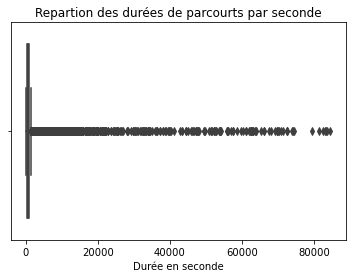

In [23]:
#Commençons par un boxplot
sb.boxplot(df_Gobike_clean['duree_sec'])
plt.title('Repartion des durées de parcourts par seconde')
plt.xlabel('Durée en seconde')
plt.show()

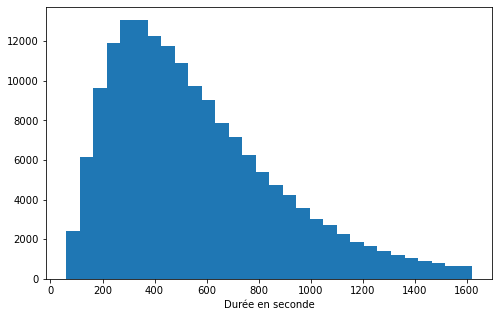

In [24]:
# Utilisons un histogramme pour voir aussi la distribution
binsize = 52
bins = np.arange(df_Gobike_clean['duree_sec'].min(), (df_Gobike_clean['duree_sec'].max() - df_Gobike_clean['duree_sec'].min())/binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df_Gobike_clean, x = 'duree_sec', bins = bins)
plt.xlabel('Durée en seconde')
plt.show()

L'analyse de l'histogramme et de la boîte à moustache ci-dessus permettent de se rendre compte aisement que les durées en seconde des temps de voyage présentent une asymétrie gauche, c'est-à-dire que les petits temps de vélo observées sont plus fréquents que les valeurs plus élevées. Le temps moyen d'un trajet est de 703 secondes soit 12 minutes environ.

Ensuite examinons la distribution par rapport à l'année de naissance des membres.

C:\Users\hp\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


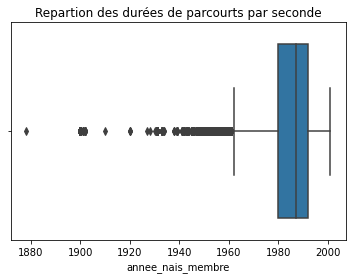

In [25]:
#boxplot
sb.boxplot(df_Gobike_clean['annee_nais_membre'])
plt.title('Repartion des durées de parcourts par seconde')
plt.show()

On voit apparaître quelques valeurs aberrantes sur les années de naissance des utilisteurs, donc sur leur âge. Pour ce travail nous décidons d'écarter les individus dont l'âge est inférieure à la limite inférieure de la boîte à moustache. 

In [26]:
#Calcul du 1er et 3e quartile
Q1=df_Gobike_clean['annee_nais_membre'].quantile(0.25)
Q3=df_Gobike_clean['annee_nais_membre'].quantile(0.75)

#Calcul de l'intervalle interQuartile
IQR=Q3-Q1

# Déterminer la limite superieur et la limite inf
sup=Q3+1.5*IQR
inf=Q1-1.5*IQR

In [27]:
# Base de données sans valeurs abérrantes
#Dans notre étude nous décidons d'écarter les valeurs abérrantes sur les années de naissances
df_Gobike_clean=df_Gobike_clean[(df_Gobike_clean['annee_nais_membre'] >= inf) & (df_Gobike_clean['annee_nais_membre'] <= sup)]

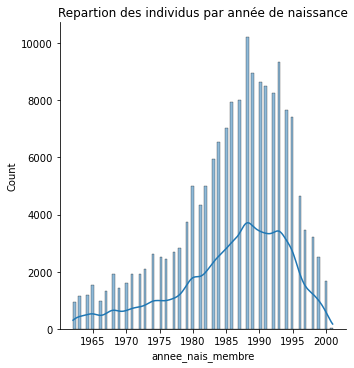

In [28]:
#Visualisation à partir d'un histogramme
sb.displot(df_Gobike_clean['annee_nais_membre'], kde = True);
plt.title('Repartion des individus par année de naissance');

Pour ce qui est de l'âge on constate une asymétrie droite, c'est-à-dire les individus moins âgés dans notre population sont plus fréquent à voyager en velo que les individus plus agés.

Regardons la distribution des variables catégorielles.

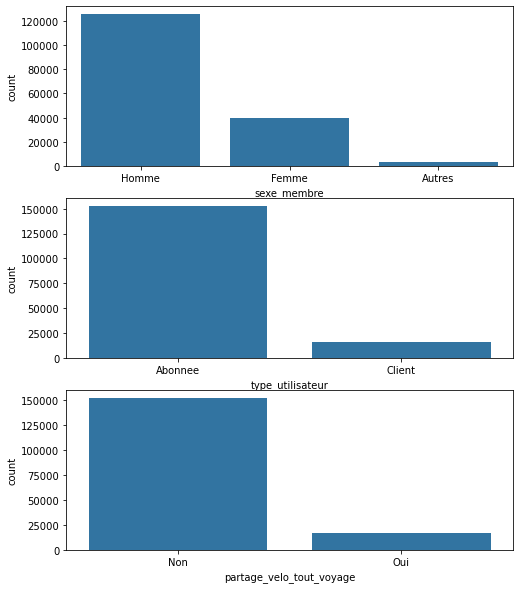

In [29]:
# Traçons les trois ensemble pour avoir une idée de la distribution de chaque variable ordinale.

fig, ax = plt.subplots(nrows=3, figsize = [8,10])

default_color = sb.color_palette()[0]
sb.countplot(data = df_Gobike_clean, x = 'sexe_membre', color = default_color, ax = ax[0])
sb.countplot(data = df_Gobike_clean, x = 'type_utilisateur', color = default_color, ax = ax[1])
sb.countplot(data = df_Gobike_clean, x = 'partage_velo_tout_voyage', color = default_color, ax = ax[2])

plt.show()

Dans l'ensemble, les individus de notre population sont des hommes avec un effectif largement surpérieure à celui des femmes. La plupart des utilisateurs du vélo sont des abonnées du système. Aussi la plupart des vélos n'ont pas été partagé lors du voyage. 

Enfin regardons la distribution des autres variables pour voir si l'on peut tirer quelque chose de bon.

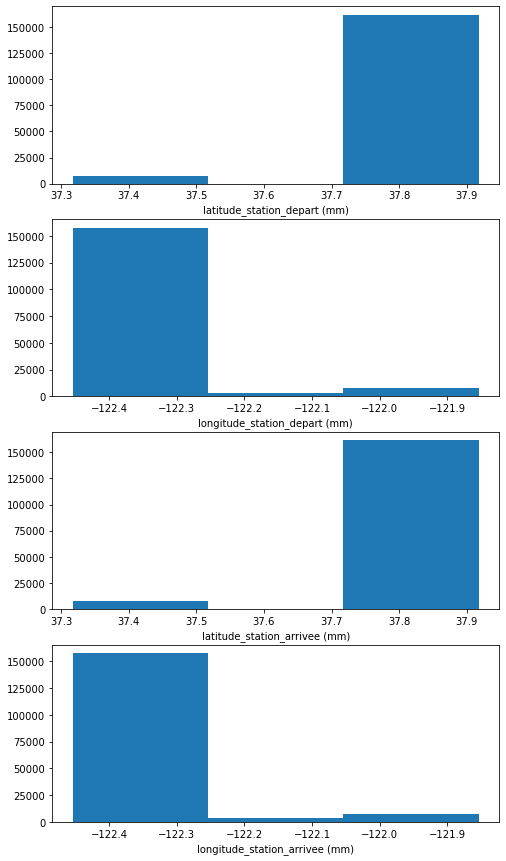

In [30]:
# Visualisation des variables latitude, logitude de depart et d'arrivée
fig, ax = plt.subplots(nrows=4, figsize = [8,15])

variables = ['latitude_station_depart', 'longitude_station_depart', 'latitude_station_arrivee', 
             'longitude_station_arrivee']

for i in range(len(variables)):
    var = variables[i]
    bins = np.arange(min(df_Gobike_clean[var]), max(df_Gobike_clean[var])+0.2, 0.2)
    ax[i].hist(data = df_Gobike_clean, x = var, bins = bins)
    ax[i].set_xlabel('{} (mm)'.format(var))

plt.show()

La latitude de la station de depart et d'arrivée semble avoir la même distribution, pareille pour la longitude de depart et d'arrivé.

Ajoutons à notre base les variables heure et jour pour voir quelle est le comportement des voyageurs par rapport au jour de la semaine ou aux heures de la journée.

In [31]:
# Ajout des variables heure, Jour et moi
df_Gobike_clean['heure_dp'] = df_Gobike_clean['heure_depart'].dt.hour
df_Gobike_clean['jour_dp'] = df_Gobike_clean['heure_depart'].dt.day

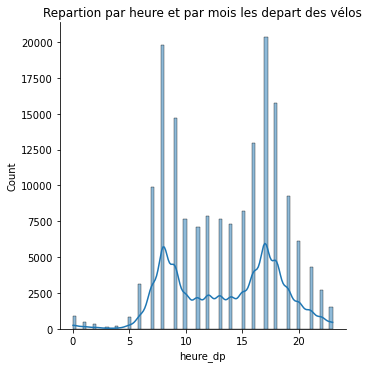

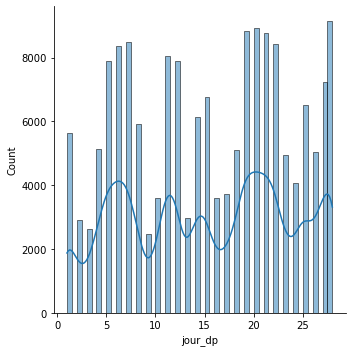

In [32]:
#Visualisation de des heures et des jours de depart 
sb.displot(df_Gobike_clean['heure_dp'], kde = True);
plt.title('Repartion par heure et par mois les depart des vélos')
sb.displot(df_Gobike_clean['jour_dp'], kde = True);


Nos observations concernent uniquement le mois de février 2019, et pendant ce mois, on observe une augmentation progressive du nombre de voyage pendant les jours ordinaires et une baisse les week-ends. Les heures préférées des voyageurs sont pour la plupart le matin à 8h et le soir vers 17h, 18h.

Pour finir, visualisons les stations de depart et d'arrivée.

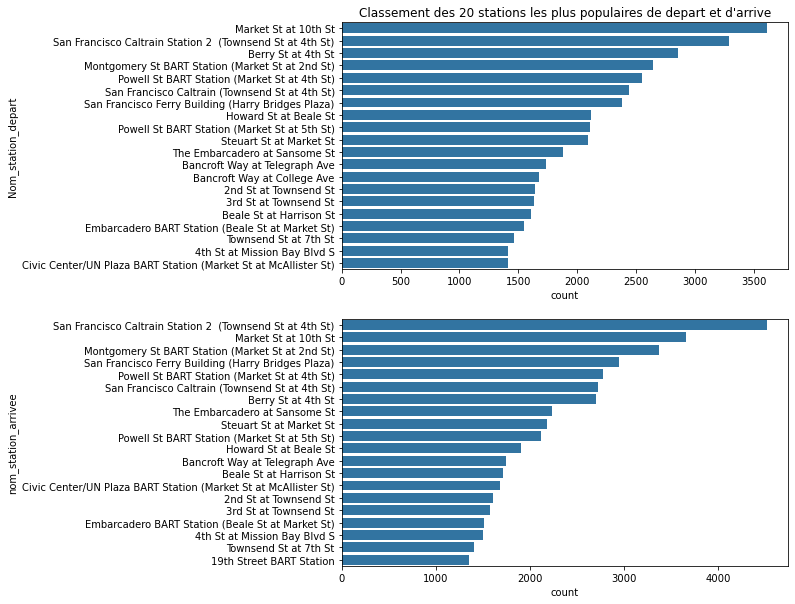

In [33]:
# Visualisation des variables Nom_station_depart et nom_station_arrivee.
plt.figure(figsize = [8, 10])

plt.subplot(2, 1, 1) 
type_order1 = df_Gobike_clean['Nom_station_depart'].value_counts()[:20].index 
sb.countplot(data=df_Gobike_clean, y='Nom_station_depart', color=default_color, order=type_order1);
plt.title("Classement des 20 stations les plus populaires de depart et d'arrive")

plt.subplot(2, 1, 2)
type_order2 = df_Gobike_clean['nom_station_arrivee'].value_counts()[:20].index 
sb.countplot(data=df_Gobike_clean, y='nom_station_arrivee', color=default_color, order=type_order2);

Pour des soucis de visibiliter nous avons choisi de ne représenter que les 20 premières stations de départ et d'arrivée et il apparait que les stations les plus populaires sont: San Franscisco Caltrain, Market St at 10th St, Montgomery, Powell St BART Station que ça soit pour les stations de depart ou d'arrivée.

### Discutez de la répartition de vos variables d’intérêt. Y a-t-il eu des points inhabituels? Avez-vous eu besoin d’effectuer des transformations?

> La variable durée en seconde présente une distribution étalé vers la droite avec des petits temps de voyage en velo plus fréquent que des longs temps de voyage. Les voyages se font pour la plupart les jours ordinaires, le matin (8h) et le soir(17h).

### Parmi les caractéristiques que vous avez examinées, y avait-il des distributions inhabituelles? Avez-vous effectué des opérations sur les données pour ranger, ajuster ou modifier la forme des données? Si oui, pourquoi l’avez-vous fait?

> La caractère année de naissance des membres présentait des variables aberrantes que nous avons écarté de notre analyse. Ces valeurs écarté semblait être incohérentes du fait de l'âge que pouvait avoir ces individus à la date (année) où les données ont été recueillie, à savoir 20019. 

<a id='eb'></a>
## Exploration Bivariée

> Pour commencer examinons les corrélations deux à deux entre les variables de notre base.

Commençons par les corrélations entre variables quantitatives.

In [34]:
# Liste des variables quantitatives et des variables catégorielles
var_num = ['duree_sec', 'latitude_station_depart', 'longitude_station_depart', 
           'latitude_station_arrivee', 'longitude_station_arrivee', 'annee_nais_membre']
var_categ = ['sexe_membre', 'type_utilisateur', 'partage_velo_tout_voyage']

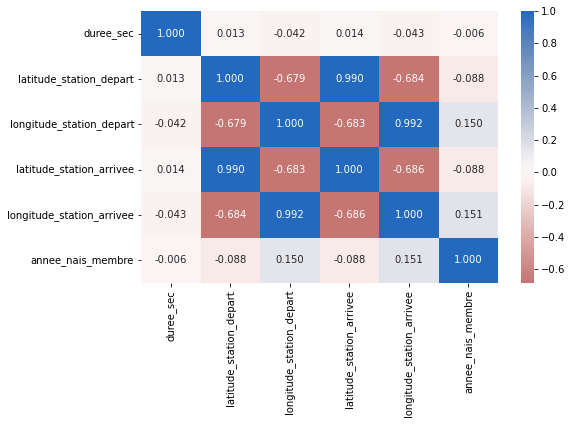

In [35]:
#Correlation entre les variables numeriques
plt.figure(figsize = [8, 5])
sb.heatmap(df_Gobike_clean[var_num].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0)
plt.show()

Dimension Gobike= (169171, 18)
df_Gobike_clean_echan.shape= (169171, 18)


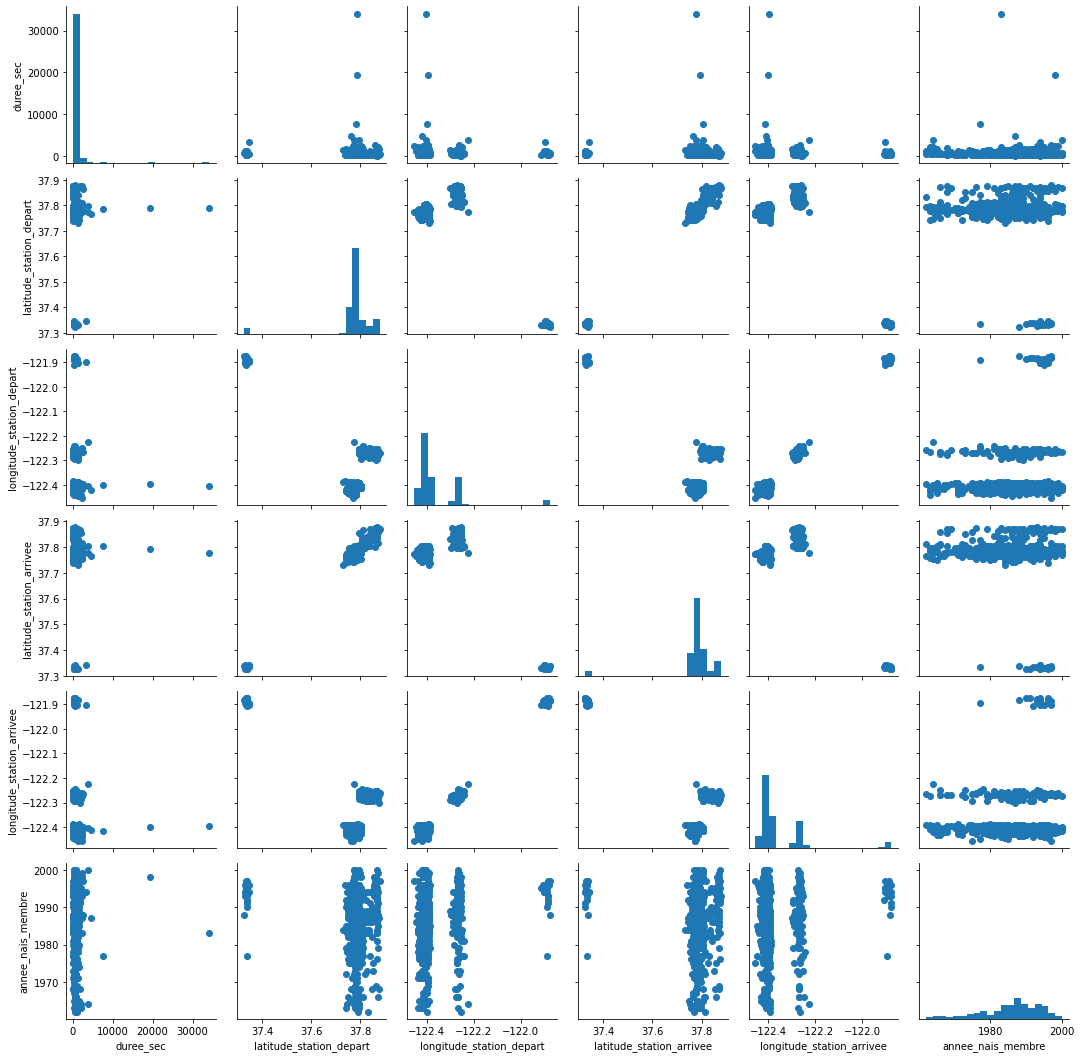

In [36]:
# Matrice graphique: Nous représentons ici un échantillon de 500 individus pour avoir plus de visibilité
# On fait un tirage aléatoire sans remise

print("Dimension Gobike=",df_Gobike_clean.shape)
df_Gobike_clean_echan = df_Gobike_clean.sample(n=500, replace = False)
print("df_Gobike_clean_echan.shape=",df_Gobike_clean.shape)

g = sb.PairGrid(data = df_Gobike_clean_echan, vars = var_num)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter)

En représentant les corrélations entre les variables quantitatives, il apparait que notre variable d'interêt n'est aucunement liée à une autre variable quantitative. Seule les variables de position qui semble être liées. La longitude de depart et d'arrivée sont fortement liée, il en est de même pour la latitude de depart et d'arrivée. Il existe aussi une correlation négative entre la latitude et la longitude de depart et d'arrivée.

Regardons maintenant la correlation entre les variables duree_sec, année de naissance et les variables catégorielles.

<Figure size 720x720 with 0 Axes>

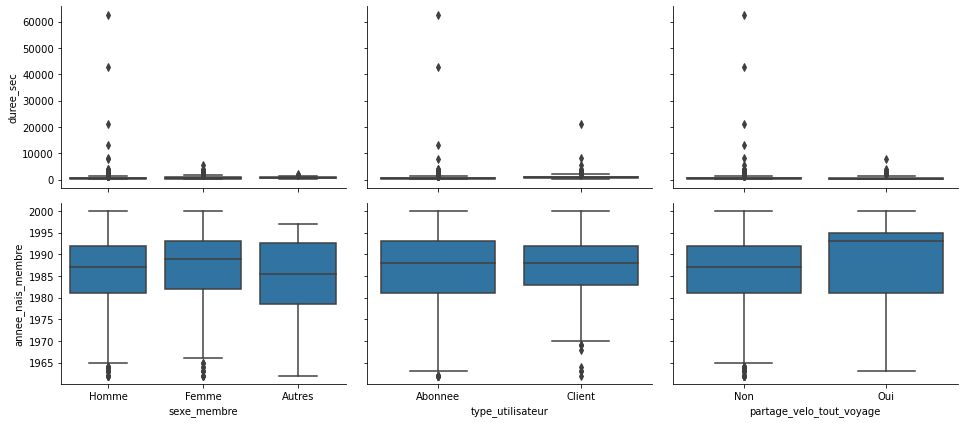

In [37]:
# Tracer des caractéristiques des var numeric par rapport aux variables catégorielles.
# On utiliser un échantillon aléatoire, toujours pour des soucis de visibilité.

df_Gobike_clean_echan = df_Gobike_clean.sample(n=2000, replace = False)


def boxgrid(x, y, **kwargs):
    """ Hack rapide pour créer des parcelles de boîtes avec PairGrid de seaborn. """
    default_color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sb.PairGrid(data = df_Gobike_clean_echan, y_vars = ['duree_sec', 'annee_nais_membre'], x_vars = var_categ,
                height = 3, aspect = 1.5)
g.map(boxgrid)
plt.show();

In [38]:
# calculer le logarithme de la durée
def log_trans(x, inverse = False):
    """ Fonction rapide pour faire des opérations sur le logarithme et la puissance """
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

df_Gobike_clean['log_dure'] = df_Gobike_clean['duree_sec'].apply(log_trans)

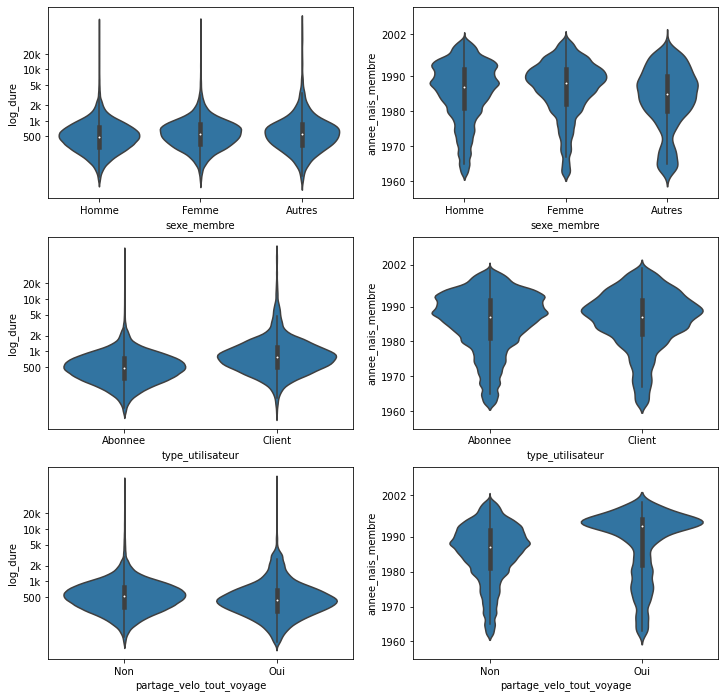

In [39]:
# Visualisation avec la trorformation log de la variable durée en seconde
fig, ax = plt.subplots(ncols = 2, nrows = 3 , figsize = [12,12])

for i in range(len(var_categ)):
    var = var_categ[i]
    sb.violinplot(data = df_Gobike_clean, x = var, y = 'log_dure', ax = ax[i,0],
               color = sb.color_palette()[0])
    ax[i,0].set_yticks(log_trans(np.array([500, 1e3, 2e3, 5e3, 1e4, 2e4])))
    ax[i,0].set_yticklabels([500, '1k', '2k', '5k', '10k', '20k'])
    sb.violinplot(data = df_Gobike_clean, x = var, y = 'annee_nais_membre', ax = ax[i,1],
               color = sb.color_palette()[0])
    ax[i,1].set_yticks([1960, 1970, 1980, 1990, 2002])
    ax[i,1].set_yticklabels([1960, 1970, 1980, 1990, 2002])
    ax[i,1].set_ylim(np.array([1955, 2010]))

plt.show()

La repartition d'année de naissance et de durée de voyage au sein des groupes constitutifs des variables sexe des membres et type d'utilisateur se fait de la même façon c'est-à-dire que les années de naissance ou la durée en seconde des voyages ne diffère pas que l'on soit abonnée ou pas, que l'on soit un Homme ou Femme. On dira qu'il n'y pas de dépendance ou de liaison apparente entre les variables année de naissance, durée en seconde et les variables sexe membre, type d'utilisateur.

Par contre pour la variable partage de vélo, les gens qui ont partagé le vélo sont un peu plus jeune que les gens qui n'ont pas fait le partage de vélo, on peut donc penser que l'âge diminue avec le fait de partager le vélo pour un voyage. On dira qu'il y'a une dependance entre les variables année de naissance et partage de velo. Par contre il n'y a pas de liaison entre la variable partage de vélo et durée du voyage.

Notons ici que nous avons décidé de passer au log de la variable durée pour avoir une bonne visibilité.

Examinons enfin les relations entre les trois variables catégorielles.

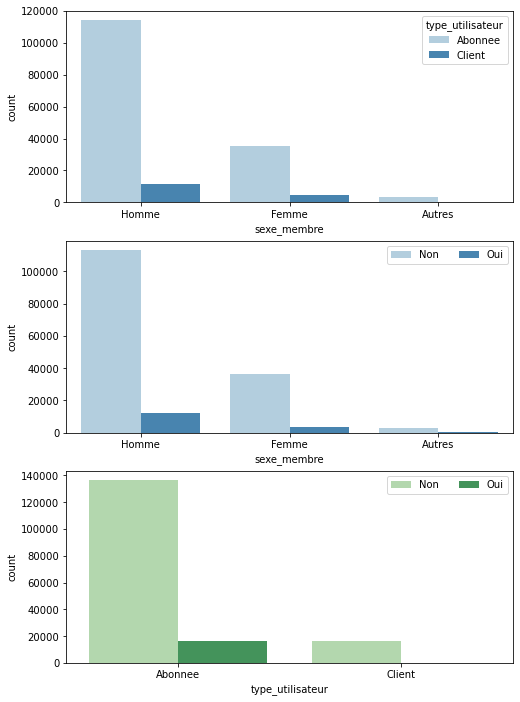

In [40]:
#visualisation
plt.figure(figsize = [8, 12])

# subplot 1: sexe_membre vs type_utilisateur
plt.subplot(3, 1, 1)
sb.countplot(data = df_Gobike_clean, x = 'sexe_membre', hue = 'type_utilisateur', palette = 'Blues')

# subplot 2: sexe_membre vs. partage_velo_tout_voyage
ax = plt.subplot(3, 1, 2)
sb.countplot(data = df_Gobike_clean, x = 'sexe_membre', hue = 'partage_velo_tout_voyage', palette = 'Blues')
ax.legend(ncol = 2) # re-arrange legend to reduce overlapping

# subplot 3: type_utilisateur vs. partage_velo_tout_voyage,
ax = plt.subplot(3, 1, 3)
sb.countplot(data = df_Gobike_clean, x = 'type_utilisateur', hue = 'partage_velo_tout_voyage', palette = 'Greens')
ax.legend(loc = 1, ncol = 2)

plt.show()

Dans l'ensemble la mojorité des utilisateurs du sytème de voyage en velo sont des abonnées, et pour la plupart ce sont des hommes. Les clients n'ont pas partagé leur velo tout au long de leurs voyages.

### Parlez de certaines des relations que vous avez observées dans cette partie de l’enquête. En quoi les caractéristiques d’intérêt variaient-elles avec les autres caractéristiques de l’ensemble de données?

> Le caractère durée en seconde ne présente pas de correlation apparante avec les autres variables quantitatives, il en est de même avec les variables catégorielles. Le constat est resté le même quand nous sommes passé au log de la variable durée: Pas de correlation.

### Avez-vous observé des relations intéressantes entre les autres caractéristiques (et non les principales caractéristiques d’intérêt)?

> On a pu détecter une relation entre les années de naissance et le fait de partager ou de ne pas partager le velo lors du voyage. On peut souligner aussi la correlation positive qui existe entre la longitude de depart et d'arriver, la latitude de depart et d'arriver. Aussi l'on voit une correlation négative entre la latitude et la longitude(de depart et d'arriver). 

<a id='em'></a>
## Exploration multivariée

> Dans cette partie nous allons croisé deux variables quantitatives (duree_sec et annee_nais_mebre) avec les trois variables catégorielles. 

Commençons avec la variable type d'utilisateur.

Text(0.5, 1.0, '')

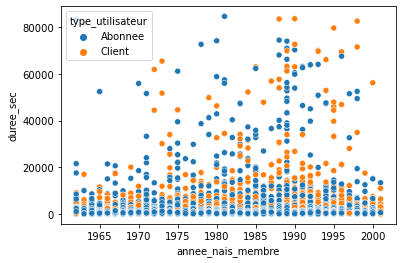

In [41]:
# visualisation avec un nuage de points
sb.scatterplot(data=df_Gobike_clean,x='annee_nais_membre',y='duree_sec',hue='type_utilisateur')
plt.title('')

Les clients les plus jeunes sont ceux qui ont fait des durées assez longue dans les voyages de vélo.

Avec la variables sexe des membres

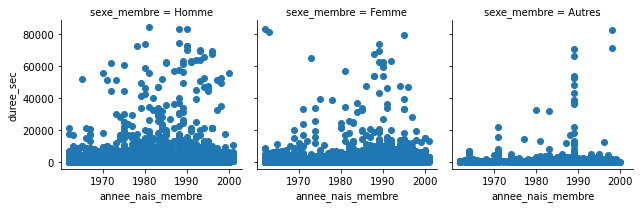

In [42]:
#Visualisation
g=sb.FacetGrid(data=df_Gobike_clean,col='sexe_membre')
g.map(plt.scatter,'annee_nais_membre','duree_sec')

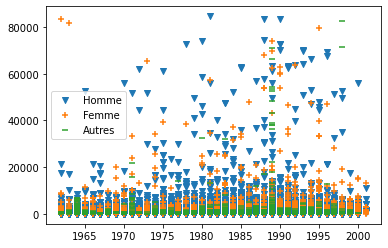

In [43]:
# donner une forme pour chaque valeur de la variable qual
marques=[['Homme','v'],['Femme','+'],['Autres','_']]
# affecter les formes pour chaque valeurs
for i,j in marques:
    df_plot=df_Gobike_clean.loc[df_Gobike_clean['sexe_membre']==i]
    plt.scatter(data=df_plot,x='annee_nais_membre',y='duree_sec',marker=j)
plt.legend(['Homme', 'Femme', 'Autres'])

Les hommes plus jeunes dans notre population sont ceux qui ont fait des durées assez longue.

Avec la variable partage du velo pour le voyage.

Text(0.5, 1.0, '')

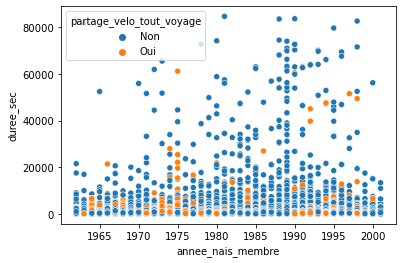

In [44]:
sb.scatterplot(data=df_Gobike_clean,x='annee_nais_membre',y='duree_sec',hue='partage_velo_tout_voyage')
plt.title('')

Les personnes moins âgé et qui ont fait de longue durée sont pour la plupart des personnes qui n'ont pas partagés leur vélo durant le trajet.

### Parlez de certaines des relations que vous avez observées dans cette partie de l’enquête. Y a-t-il des caractéristiques qui se sont mutuellement renforcées pour ce qui est d’examiner vos caractéristiques d’intérêt?

> Les clients les plus jeunes sont ceux qui ont fait des durées assez longue dans les voyages de vélo. On note aussi que les hommes plus jeunes dans notre population sont ceux qui ont fait des durées assez longue. Les personnes moins âgé et qui ont fait de longue durée sont pour la plupart des personnes qui n'ont pas partagés leur vélo durant le trajet.

### Y a-t-il eu des interactions intéressantes ou surprenantes entre les fonctions?

> Pas d'interactions intéressantes.

<a id='conclusions'></a>
## Conclusions
> Pour ce projet nous avons choisis quelques caractères à examiner dès le début de notre analyse, à savoir: la durée du voyage, la période (heure, jour) où s'effectue les voyages,  les stations les plus populaires. Il est ressort de ces analyses quelques points intéressants:
>- Dans l'ensemble, notre population est constituée essentiellement des hommes et le système de partage de vélo est beaucoup plus utilisé par les abonnées;
>- La plupart des voyages se font les jours ouvrables (jour ordinaire) et la plupart d'entre elles s'effectuent le matin à 8h et le soir entre 17h et 18h;
>- Les stations les plus populaires sont: San Franscisco Caltrain, Market St at 10th St, Montgomery, Powell St BART Station
>- Ceux qui font les partages de vélo sont les personnes moins agé de notre popupaltion et les clients n'ont pas fait de partage pendant la période de l'étude;
>- Les clients les plus jeunes sont ceux qui ont fait des durées assez longue dans les voyages de vélo. On note aussi que les hommes plus jeunes dans notre population sont ceux qui ont fait des durées assez longue. Les personnes moins âgé et qui ont fait de longue durée sont pour la plupart des personnes qui n'ont pas partagés leur vélo durant le trajet.